### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [2]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv(r'C:\Users\aefim\github\Start_ML\large\lesson_7\processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [3]:
initial_data = pd.read_csv(r'C:\Users\aefim\github\Start_ML\large\lesson_7\taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [4]:
# Проверка, что количество строк в исходных и обработанных данных совпадает
initial_data.shape[0] == processed_data.shape[0]

True

In [5]:
### Вернем в датасет колонку pickup_datetime

# Сделаем индексами id
initial_data = initial_data.set_index('id')

# Объединим датасеты
processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [6]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [7]:
# Преобразуем колонку pickup_datetime в формат datetime
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

# Добавим колонки с датой, днем недели, часом и месяцем
processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [8]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

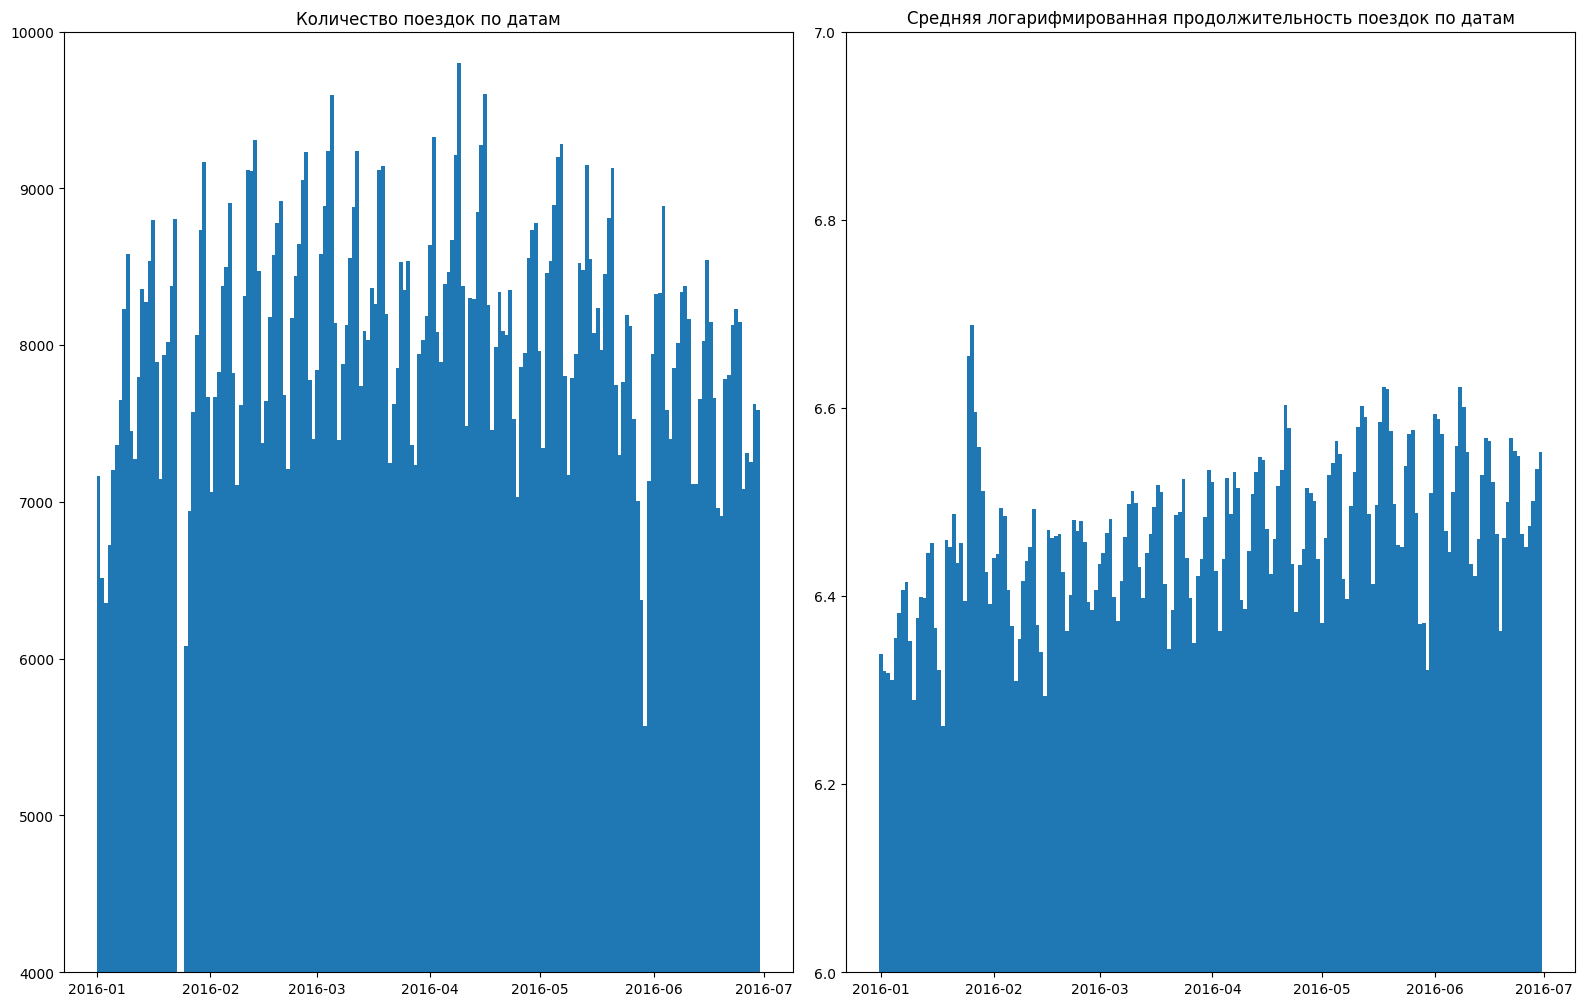

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


### Количество поездок/Средняя продолжительность поездки vs День недели

C:\Users\aefim\AppData\Local\Temp\ipykernel_23556\3637031108.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axs[0].plot(processed_data.groupby('day_of_week').mean()['log_trip_duration'], label='Средняя продолжительность поездки')


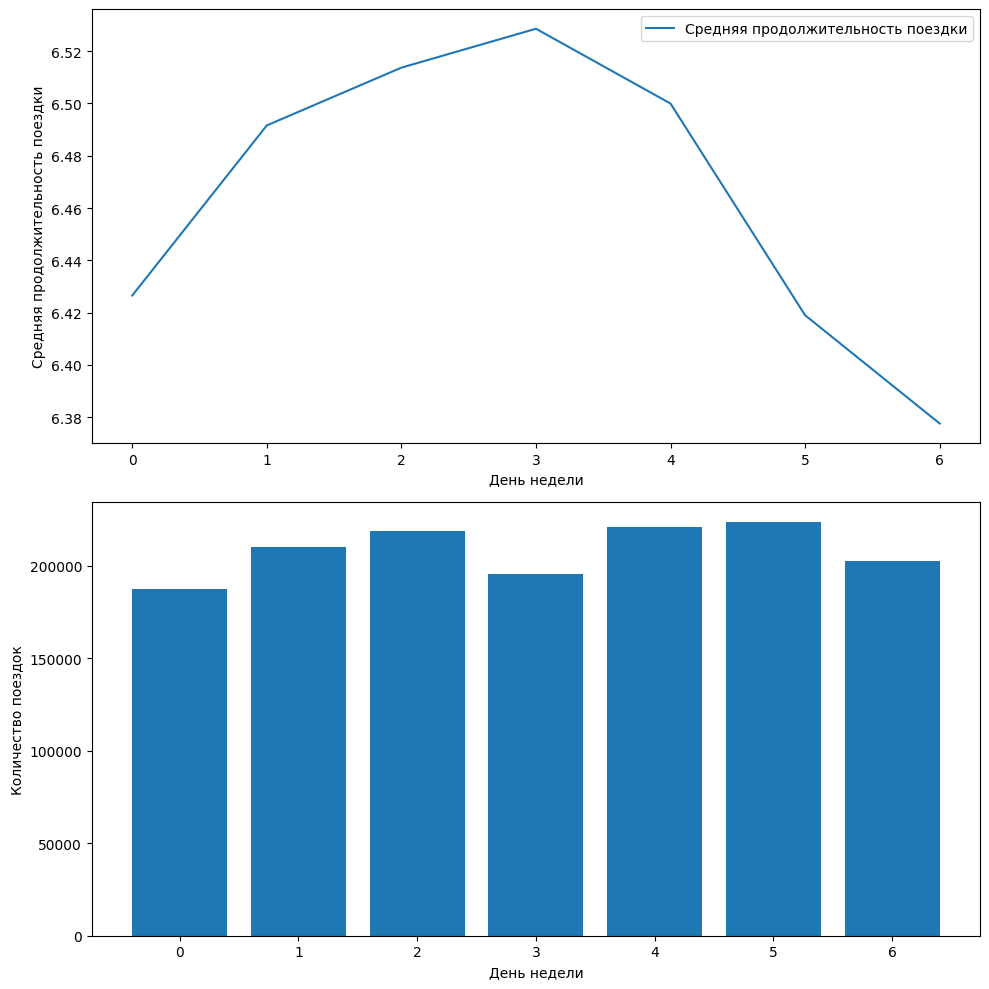

In [10]:
import matplotlib.pyplot as plt

# Создаем объекты для двух подграфиков
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Настраиваем первый подграфик
axs[0].plot(processed_data.groupby('day_of_week').mean()['log_trip_duration'], label='Средняя продолжительность поездки')
axs[0].set_xlabel('День недели')
axs[0].set_ylabel('Средняя продолжительность поездки')
axs[0].legend()

# Настраиваем второй подграфик
axs[1].bar(processed_data['day_of_week'].unique(), processed_data.groupby('day_of_week').count()['vendor_id'])
axs[1].set_xlabel('День недели')
axs[1].set_ylabel('Количество поездок')

# Устанавливаем плотное размещение подграфиков
plt.tight_layout()

# Отображаем график
plt.show()


Здесь мы видим, что продолжительность поездок сильно осцилируется в течение недели при этом среднее количество поездок в день недели меняется достаточно немного.
Понедельник и Четверг - дни с наименьшим количеством поездок, среда, пятница и суббота - с наибольшим.

Так как наш таргет предсказания - продолжительность поездки, то мы можем сделать вывод, что **день недели сильно влияет на продолжительность поездки** и мы должны включить этот признак в нашу модель.

Как дополнительную гипотезу можно вывести то, что в четверг может быть меньше поездок из за больших пробок в городе, так как мы видим, что в этот день недели средняя продолжительность поездки самая большая.

### Количество поездок/Средняя продолжительность поездки vs время суток

C:\Users\aefim\AppData\Local\Temp\ipykernel_23556\3366902163.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axs[0].plot(processed_data.groupby('hour').mean()['log_trip_duration'], label='Средняя продолжительность поездки')


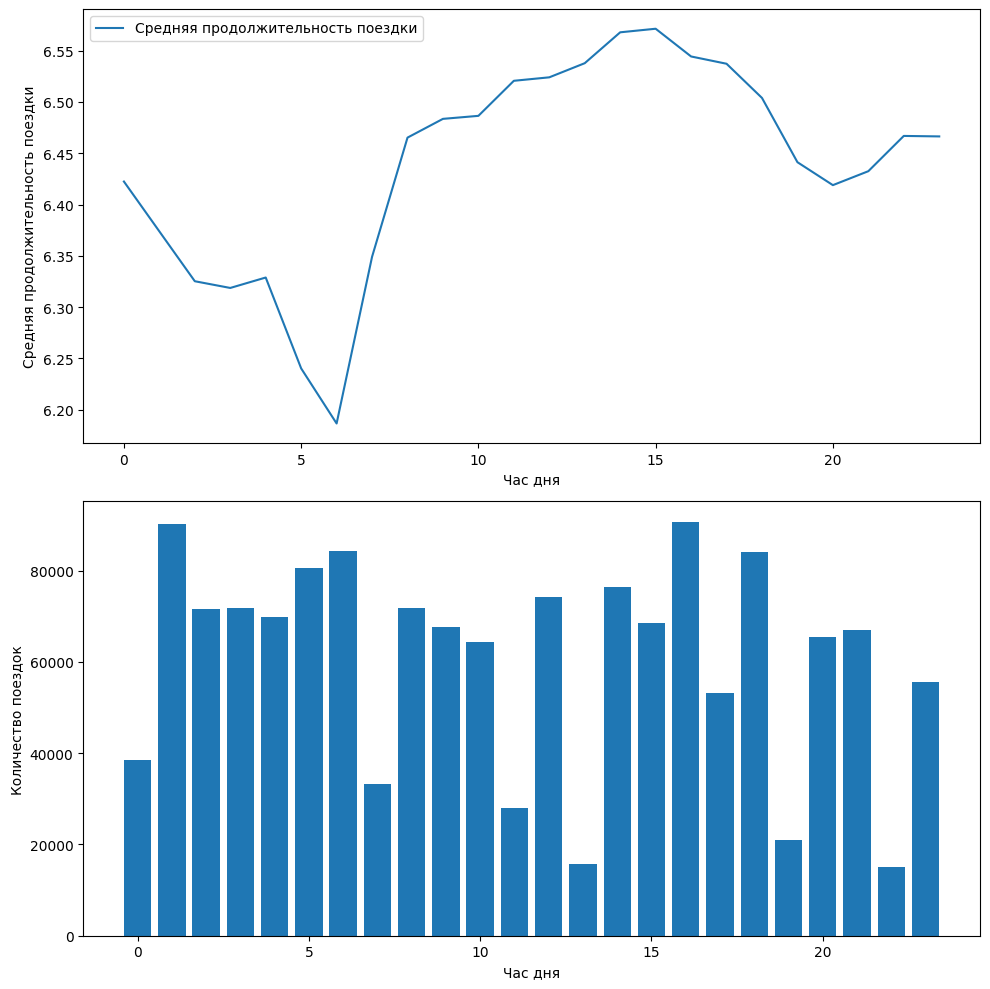

In [11]:
# Создаем объекты для двух подграфиков
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Настраиваем первый подграфик
axs[0].plot(processed_data.groupby('hour').mean()['log_trip_duration'], label='Средняя продолжительность поездки')
axs[0].set_xlabel('Час дня')
axs[0].set_ylabel('Средняя продолжительность поездки')
axs[0].legend()

# Настраиваем второй подграфик
axs[1].bar(processed_data['hour'].unique(), processed_data.groupby('hour').count()['vendor_id'])
axs[1].set_xlabel('Час дня')
axs[1].set_ylabel('Количество поездок')

# Устанавливаем плотное размещение подграфиков
plt.tight_layout()

# Отображаем график
plt.show()

Из первого графика можно вывести то, что продолжительность поездки сильно осцилирует в течение дня, а количество поездок меняется достаточно немного.

При этом, средняя продолжительность поездки в 6 утра самая маленькая, а в 15 часов - самая большая.

### Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)

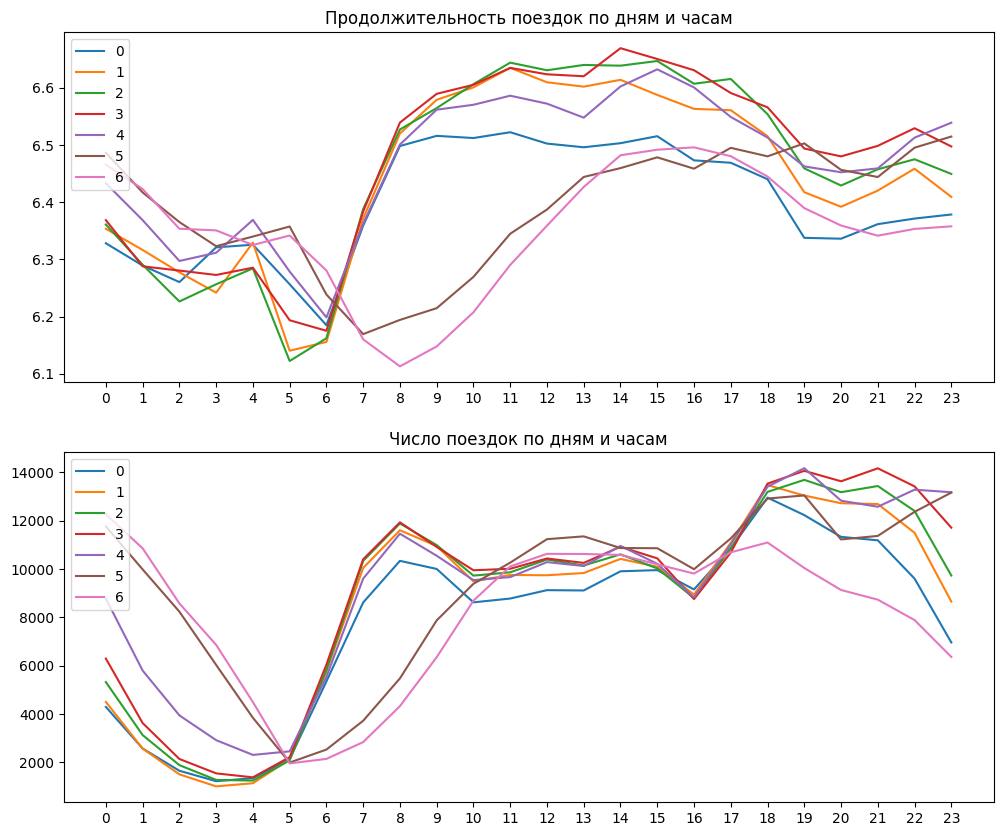

In [12]:
hour_week_duration = processed_data.groupby(['hour','day_of_week']).log_trip_duration.mean().reset_index()
hour_week_count = processed_data.groupby(['hour','day_of_week']).log_trip_duration.count().reset_index()

fig = plt.figure()

fig.set_size_inches(12, 10)

ax_1 = fig.add_subplot(2, 1, 1)
for day in hour_week_duration.day_of_week.unique():
    plt.plot('hour','log_trip_duration', data=hour_week_duration.query('day_of_week == @day'), label=day)
plt.legend(loc="upper left")
plt.xticks(hour_week_duration.hour.unique())
plt.title('Продолжительность поездок по дням и часам')

ax_2 = fig.add_subplot(2, 1, 2)
for day in hour_week_count.day_of_week.unique():
    plt.plot('hour','log_trip_duration', data=hour_week_count.query('day_of_week == @day'), label=day)
plt.legend(loc="upper left")
plt.xticks(hour_week_count.hour.unique())
plt.title('Число поездок по дням и часам')

plt.show()

<ing src="https://i.imgur.com/zMFkVQE.png" width="500">

### Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.

In [13]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


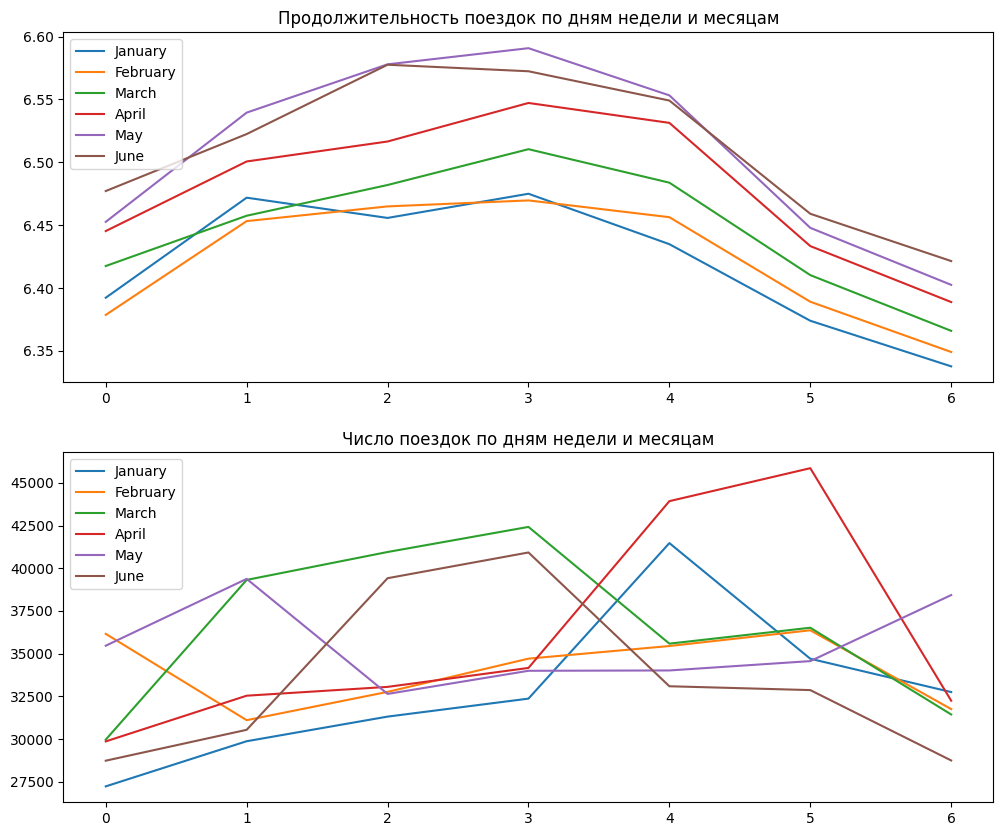

In [14]:
months = range(1, 13)
day_month_duration = processed_data.groupby(['day_of_week', 'month']).log_trip_duration.mean().reset_index()
day_month_duration = day_month_duration[day_month_duration['month'].isin(months)]
day_month_count = processed_data.groupby(['day_of_week', 'month']).log_trip_duration.count().reset_index()
day_month_count = day_month_count[day_month_count['month'].isin(months)]

# create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July'}

# apply mapping to 'month' column in day_month_duration and day_month_count DataFrames
day_month_duration['month'] = day_month_duration['month'].map(month_names)
day_month_count['month'] = day_month_count['month'].map(month_names)

fig = plt.figure()
fig.set_size_inches(12, 10)

ax_1 = fig.add_subplot(2, 1, 1)
for month in day_month_duration.month.unique():
    plt.plot('day_of_week', 'log_trip_duration', data=day_month_duration.query('month == @month'), label=month)
plt.legend(loc="upper left")
plt.xticks(day_month_duration.day_of_week.unique())
plt.title('Продолжительность поездок по дням недели и месяцам')

ax_2 = fig.add_subplot(2, 1, 2)
for month in day_month_count.month.unique():
    plt.plot('day_of_week', 'log_trip_duration', data=day_month_count.query('month == @month'), label=month)
plt.legend(loc="upper left")
plt.xticks(day_month_count.day_of_week.unique())
plt.title('Число поездок по дням недели и месяцам')

plt.show()


### Ящики с усами для различных: времени суток, дня недели, месяца

<img src="https://media.discordapp.net/attachments/1004748557477224498/1080102509143662682/MAD_Boxes_with_mustaches_f77d22e0-e976-432e-b87b-3eea2bde2253.png?width=356&height=533" width="200">

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

### Давайте попробуем сгруппировать данные и преобразовать их.

Добавьте следующие бинарные признаки:

1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

**P.S.** назовите колонки **`anomaly`** и **`traffic_jam`**

Теперь колонки `pickup_datetime`, `date` можно убрать. А про оставшиеся `day_of_week`, `hour`, `month` необходимо подумать:

1. С одной стороны, первые две можно убрать, так как на их основе была создана колонка `traffic_jam`
2. С другой стороны, зависимость с колонкой `traffic_jam` нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть `day_of_week`, `hour` и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью `OneHotEncoder`.
3. Последняя (`month`) очевидно категориальная. Можно закодировать ее тоже через `OneHotEncoder`.

Выполните необходимые вычисления в ноутбуке. После того, как вы изменили эти колонки, сохраните первые 5 строк полученного промежуточного датафрейма в файл в формате csv с сепаратором `,`. Отправьте полученный файл в форму ниже.

Hint! Промежуточный датафрейм содержит 41 колонку

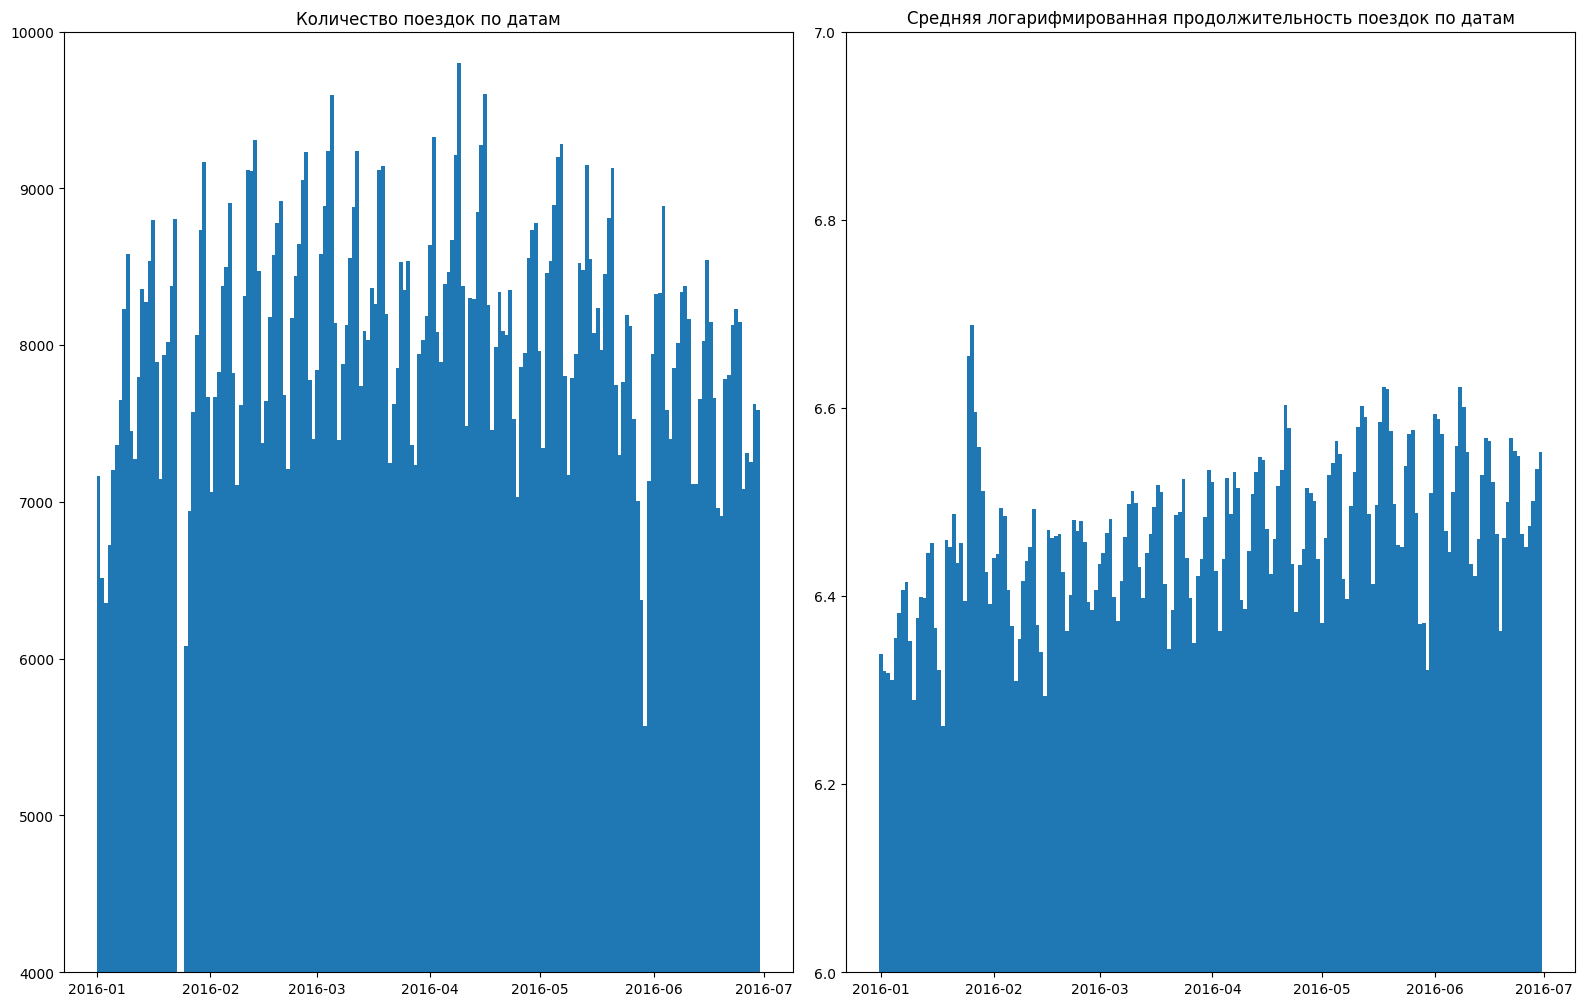

In [15]:
fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

#### В кратце, что нужно сделать:
Вам нужно создать два новых бинарных признака: "anomaly" и "traffic_jam" на основе данных о погоде и времени поездки соответственно. Для создания "traffic_jam" признака необходимо посчитать среднее значение таргета для каждой пары "день недели"-"время суток" и найти топ-10 самых "больших" пар. Затем для каждой поездки в данных нужно проверить, была ли она совершена во время, входящее в этот топ-10.

Также нужно решить, что делать с колонками "day_of_week", "hour" и "month". Вы можете использовать их все в комбинации, закодировав их с помощью OneHotEncoder, чтобы получить категориальные признаки.

После этого необходимо сохранить первые 5 строк полученного промежуточного датафрейма в файл в формате csv и отправить его в форму.

Хорошо, вот пошаговый план:

1. Создайте бинарный признак "anomaly", используя информацию о погоде. Для этого создайте новую колонку в данных и заполните ее значениями 0 или 1 в зависимости от того, была ли поездка совершена в день, когда была буря.
    
2. Создайте бинарный признак "traffic\_jam", используя информацию о времени поездки и таргете. Для этого выполните следующие шаги:
    
    - Разбейте данные на группы по парам `day_of_week`-`hour`.
        
    - Посчитайте среднее значение таргета - `log_trip_duration` для каждой группы.
        
    - Отсортируйте группы по убыванию среднего значения таргета `log_trip_duration` и выберите топ-10 групп.
        
    - Создайте новую колонку в данных и заполните ее значениями 0 или 1 в зависимости от того, находится ли время поездки в топ-10 группах или нет.
        
3. Удалите колонки "pickup\_datetime" и "date" из данных.
    
4. Закодируйте категориальные колонки "day\_of\_week", "hour" и "month" с помощью OneHotEncoder.
    
5. Сохраните первые 5 строк полученного промежуточного датафрейма в файл в формате csv с сепаратором ",".
    
6. Отправьте полученный файл в форму.

In [16]:
### Находим день с минимальным количеством поездок

# Создаем колонку anomaly и заполняем ее нулями
processed_data['anomaly'] = 0

# Найдём один день с минимальным количеством поездок
processed_data.groupby('date').count()['vendor_id'].sort_values().head(1)

date
2016-01-23    1648
Name: vendor_id, dtype: int64

In [17]:
# перевожу в другой тип дату
processed_data.date = pd.to_datetime(processed_data.date)

# нахожу дату с минимальным количеством поездок
min_date = processed_data.date.value_counts().idxmin()

In [18]:
# Создаём бинарный признак anomaly
processed_data['anomaly'] = processed_data.date.apply(lambda x: 1 if x == min_date else 0)
processed_data.query('date == "2016-01-23"').head(4)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id1027675,1,930.399753,0,1.001201,7.088409,2016-01-23 08:46:42,2016-01-23,5,8,1,1
id2657420,0,930.399753,0,7.044418,7.163172,2016-01-23 00:06:25,2016-01-23,5,0,1,1
id3382236,1,1070.232174,0,1.268585,5.808142,2016-01-23 10:38:43,2016-01-23,5,10,1,1
id2636301,1,930.399753,0,3.689727,6.885510,2016-01-23 01:16:58,2016-01-23,5,1,1,1


In [19]:
# Check the number of anomalies
print('Количество аномальных поездок: {}'.format(processed_data['anomaly'].sum()))

# Посчитаем количество поездок всего и аномальных
print('Количество поездок всего: {}'.format(processed_data.shape[0]))

# Среднее количество поездок в день
print('Среднее количество поездок в день: {}'.format(processed_data.shape[0] / processed_data.date.unique().shape[0]))

Количество аномальных поездок: 1648
Количество поездок всего: 1458644
Среднее количество поездок в день: 8014.527472527472


Создайте бинарный признак "traffic\_jam", используя информацию о времени поездки и таргете. Для этого выполните следующие шаги:
    
    - Разбейте данные на группы по парам `day_of_week`-`hour`.
        
    - Посчитайте среднее значение таргета - `log_trip_duration` для каждой группы.
        
    - Отсортируйте группы по убыванию среднего значения таргета `log_trip_duration` и выберите топ-10 групп.
        
    - Создайте новую колонку в данных и заполните ее значениями 0 или 1 в зависимости от того, находится ли время поездки в топ-10 группах или нет.

In [20]:
### Создадим второй бинарный признак
### traffic_jam - пробка

# найдем топ 10 дней с самым долгим временем поездки
top10 = processed_data.groupby(['day_of_week', 'hour'], as_index=False). \
    log_trip_duration.mean(). \
    sort_values('log_trip_duration', ascending=False). \
    rename({'log_trip_duration': 'top_log_trip_duration'}, axis=1). \
    head(10)
top10

,day_of_week,hour,top_log_trip_duration
86,3,14,6.669526
87,3,15,6.650622
63,2,15,6.647091
59,2,11,6.644226
61,2,13,6.640205
62,2,14,6.638930
35,1,11,6.635141
83,3,11,6.635055
111,4,15,6.632537
88,3,16,6.630965


In [21]:
processed_data = processed_data.reset_index()
processed_data

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
0,id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0
1,id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0
2,id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0
3,id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0
4,id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,1,1053.529749,0,1.226296,6.658011,2016-04-08 13:31:04,2016-04-08,4,13,4,0
1458640,id1049543,0,930.399753,0,6.056935,6.486161,2016-01-10 07:35:15,2016-01-10,6,7,1,0
1458641,id2304944,1,930.399753,0,7.832952,6.639876,2016-04-22 06:57:41,2016-04-22,4,6,4,0
1458642,id2714485,0,930.399753,0,1.093786,5.924256,2016-01-05 15:56:26,2016-01-05,1,15,1,0


In [22]:
# Зальём колонку traffic_jam в Processed_data
processed_data = processed_data.merge(top10, on=['day_of_week', 'hour'], how='left')

# Изменим данные в колонке traffic_jam на бинарные признаки
processed_data['traffic_jam'] = processed_data.top_log_trip_duration.apply(lambda x: 0 if x != x else 1)
processed_data.head(4)

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,top_log_trip_duration,traffic_jam
0,id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,NaN,0
1,id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,NaN,0
2,id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,6.635141,1
3,id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,NaN,0


In [23]:
# Убираем колонку top_log_trip_duration
processed_data = processed_data.drop('top_log_trip_duration', axis=1)

# axis=1 - значит удаляем колонку
processed_data.head(4)

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
0,id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
1,id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
2,id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
3,id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [24]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

processed_data.head(4)

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,day_of_week,hour,month,anomaly,traffic_jam
0,id2875421,1,930.399753,0,1.500479,6.122493,0,17,3,0,0
1,id2377394,0,930.399753,0,1.807119,6.498282,6,0,6,0,0
2,id3858529,1,930.399753,0,6.392080,7.661527,1,11,1,0,1
3,id3504673,1,930.399753,0,1.487155,6.063785,2,19,4,0,0


In [25]:
### Делаем OneHotEncoding и конкатим с processed_data


from sklearn.preprocessing import OneHotEncoder

# Проходим циклом по каждому столбцу 'day_of_week', 'hour', 'month'
for col in ['day_of_week', 'hour', 'month']:
    
    # Создаем объект OneHotEncoder и указываем параметры
    enc = OneHotEncoder(drop='first', dtype='int')
    
    # Преобразуем категориальные данные в бинарные, используя объект OneHotEncoder
    enc_df = pd.DataFrame(enc.fit_transform(processed_data[[col]]).toarray())
    
    # Задаем названия столбцов для каждой бинарной переменной
    enc_df.columns = enc_df.columns.map(lambda x: col + '_' + str(x+1) if col != 'month' else col + '_' + str(x+2))
    
    # Добавляем преобразованные данные в DataFrame
    processed_data = processed_data.join(enc_df, lsuffix=col, rsuffix=col)
    
    # Удаляем исходный категориальный столбец
    processed_data.drop(col, axis=1, inplace=True)


In [26]:
processed_data

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
0,id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,1,1053.529749,0,1.226296,6.658011,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1458640,id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458641,id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1458642,id2714485,0,930.399753,0,1.093786,5.924256,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
processed_data.dtypes

id                     object
vendor_id               int64
passenger_count       float64
store_and_fwd_flag      int64
distance_km           float64
log_trip_duration     float64
anomaly                 int64
traffic_jam             int64
day_of_week_1           int32
day_of_week_2           int32
day_of_week_3           int32
day_of_week_4           int32
day_of_week_5           int32
day_of_week_6           int32
hour_1                  int32
hour_2                  int32
hour_3                  int32
hour_4                  int32
hour_5                  int32
hour_6                  int32
hour_7                  int32
hour_8                  int32
hour_9                  int32
hour_10                 int32
hour_11                 int32
hour_12                 int32
hour_13                 int32
hour_14                 int32
hour_15                 int32
hour_16                 int32
hour_17                 int32
hour_18                 int32
hour_19                 int32
hour_20   

In [28]:
processed_data.columns

Index(['id', 'vendor_id', 'passenger_count', 'store_and_fwd_flag',
       'distance_km', 'log_trip_duration', 'anomaly', 'traffic_jam',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'],
      dtype='object')

In [29]:
# Считаем количество колонок в processed_data
print('Количество колонок в processed_data: {}'.format(processed_data.shape[1]))

Количество колонок в processed_data: 42


In [30]:
processed_data = processed_data.set_index('id')
processed_data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# Считаем количество колонок в processed_data
print('Количество колонок в processed_data: {}'.format(processed_data.shape[1]))

Количество колонок в processed_data: 41


In [32]:
processed_data.head(5).to_csv('df_HW_7.csv', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

<img src="https://media.discordapp.net/attachments/1004748557477224498/1080103863476027442/MAD_wooden_Boxes_with_mustaches_representing_each_month_ba254e48-ca0d-45e1-9a33-b9305e6003d0.png?width=1003&height=668" width="500">

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [33]:
### Считаем корреляцию между признаками distance_km и passenger_count

processed_data[['distance_km', 'passenger_count']].corr()

,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


In [34]:
# Округляем до 3 знаков после запятой
print('Коэффициент корреляции между distance_km и passenger_count: {}'.format(round(processed_data[['distance_km', 'passenger_count']].corr().iloc[0, 1], 3)))

Коэффициент корреляции между distance_km и passenger_count: 0.017


In [35]:
processed_data.corr()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
vendor_id,1.000000,0.258422,-0.079872,0.008107,0.019720,-0.000024,-0.003243,0.001714,-0.001434,-0.001472,...,0.002987,0.002782,0.003261,0.002912,0.000963,0.002273,0.001183,-0.002483,-0.002088,-0.003400
passenger_count,0.258422,1.000000,-0.018487,0.016596,0.027069,0.000774,-0.007711,-0.014537,-0.015004,-0.013064,...,0.003088,0.004305,0.009194,0.012457,0.010515,-0.002469,-0.001571,0.001571,0.001276,-0.000935
store_and_fwd_flag,-0.079872,-0.018487,1.000000,0.026275,0.015326,-0.000300,0.006137,-0.000167,0.000923,0.002295,...,0.000074,-0.002291,-0.003625,-0.000768,-0.000689,-0.000308,-0.002311,0.000418,-0.001071,0.002008
distance_km,0.008107,0.016596,0.026275,1.000000,0.573899,-0.002175,-0.010980,-0.008903,-0.009157,-0.001970,...,-0.019128,0.001146,0.010074,0.017711,0.028661,-0.011722,-0.001092,-0.000656,0.011662,0.008024
log_trip_duration,0.019720,0.027069,0.015326,0.573899,1.000000,-0.000464,0.060203,0.012423,0.024068,0.032476,...,-0.008300,-0.014940,-0.010723,-0.000028,-0.000160,-0.024576,-0.009166,0.008191,0.022845,0.027698
anomaly,-0.000024,0.000774,-0.000300,-0.002175,-0.000464,1.000000,-0.009163,-0.013513,-0.013798,-0.014120,...,-0.008640,-0.008230,-0.008323,-0.008128,-0.007539,-0.014862,-0.015524,-0.015356,-0.015240,-0.014713
traffic_jam,-0.003243,-0.007711,0.006137,-0.010980,0.060203,-0.009163,1.000000,-0.033208,0.201225,0.189672,...,-0.069990,-0.067377,-0.067425,-0.065841,-0.061069,-0.002765,0.008730,-0.008795,-0.009837,0.014400
day_of_week_1,0.001714,-0.014537,-0.000167,-0.008903,0.012423,-0.013513,-0.033208,1.000000,-0.164838,-0.168686,...,0.004040,0.008845,0.008425,0.002732,-0.009694,-0.010813,0.019297,-0.012799,0.025496,-0.010948
day_of_week_2,-0.001434,-0.015004,0.000923,-0.009157,0.024068,-0.013798,0.201225,-0.164838,1.000000,-0.172239,...,0.005533,0.008975,0.010968,0.006935,-0.002913,-0.008281,0.020738,-0.016528,-0.016388,0.030087
day_of_week_3,-0.001472,-0.013064,0.002295,-0.001970,0.032476,-0.014120,0.189672,-0.168686,-0.172239,1.000000,...,0.004253,0.008539,0.012817,0.011461,0.011320,-0.005204,0.020337,-0.018018,-0.016549,0.030393


<AxesSubplot: >

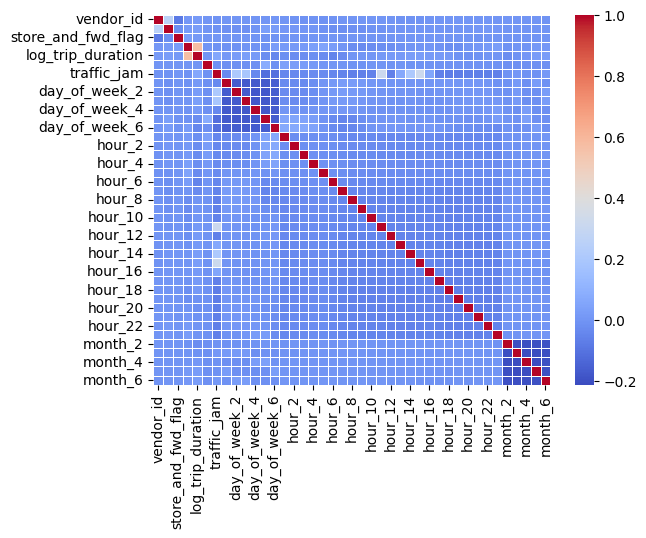

In [36]:
import seaborn as sns

# Создаем матрицу корреляции
corr_matrix = processed_data.corr()

# Создаем heatmap с помощью Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)


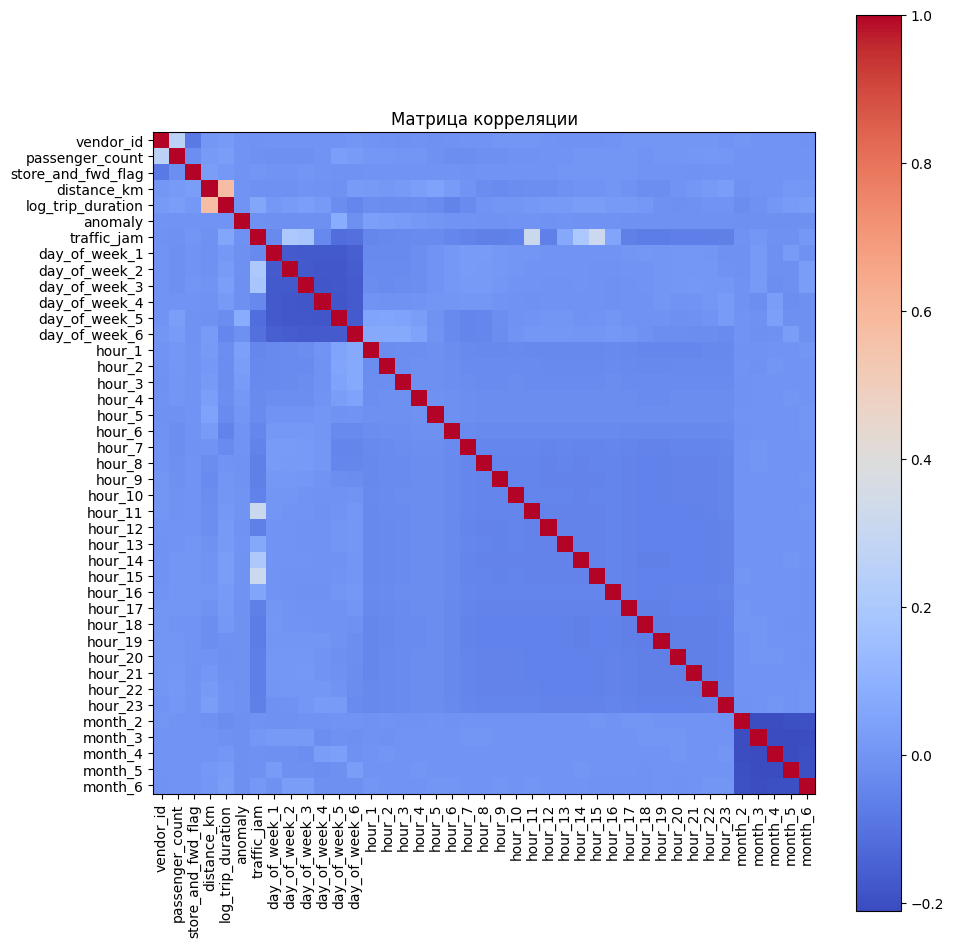

In [37]:
import matplotlib.pyplot as plt

# Создаем матрицу корреляции
corr_matrix = processed_data.corr()

# Создаем heatmap с помощью Matplotlib
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corr_matrix, cmap='coolwarm')

# Создаем colorbar для heatmap
cbar = ax.figure.colorbar(im, ax=ax)

# Отображаем названия признаков на heatmap
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Устанавливаем заголовок и отображаем heatmap
ax.set_title("Матрица корреляции")
fig.tight_layout()
plt.show()


In [38]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

# Разделяем данные на признаки и целевую переменную
X = processed_data.drop('log_trip_duration', axis=1)
Y = processed_data.log_trip_duration

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Создаем объект модели линейной регрессии
model = LinearRegression()

# Создаем объект SequentialFeatureSelector для последовательного отбора признаков
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')

# Выполняем отбор признаков на обработанных данных
sfs.fit(X, Y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [40]:
### Перечислите фичи, которые окажутся наиболее желанными
sfs.get_support()

selected_features = X.columns[sfs.get_support()]

print('Отобранные признаки: {}'.format(selected_features))

Отобранные признаки: Index(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'], dtype='object')


In [41]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

# Оставляем только выбранные признаки
selected_features = ['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']
X_selected = processed_data[selected_features]
Y = processed_data['log_trip_duration']

# Создаем объект модели линейной регрессии и обучаем его на выбранных признаках
model = LinearRegression()
model.fit(X_selected, Y)

# Вычисляем MSLE на выбранных признаках
MSLE = round(np.mean((model.predict(X_selected) - Y)**2), 3)
print('MSLE на выбранных признаках:', MSLE)


MSLE на выбранных признаках: 0.415


In [42]:
# Получаем коэффициенты регрессии и свободный член
coefficients = model.coef_
intercept = model.intercept_

# Составляем строку формулы линейной регрессии
formula = 'log_trip_duration = {:.2f}'.format(intercept)

for feature, coefficient in zip(selected_features, coefficients):
    formula += ' + {:.4f} * {}'.format(coefficient, feature)

print(formula)


log_trip_duration = 6.11 + 0.1074 * distance_km + 0.1767 * traffic_jam + -0.1286 * day_of_week_6 + -0.4367 * hour_5 + -0.3622 * hour_6


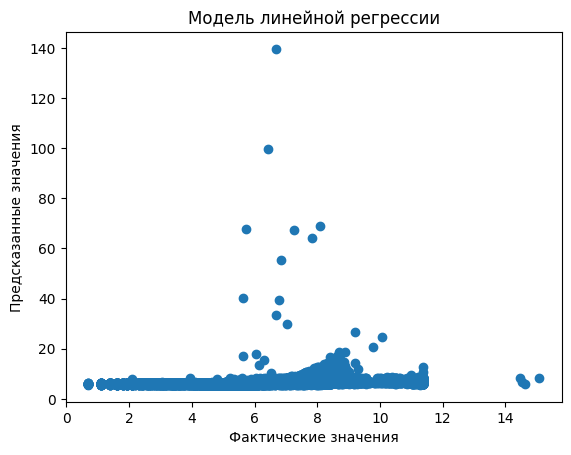

In [45]:
# Получаем набор выбранных признаков
X_selected = X.iloc[:, sfs.get_support(indices=True)]

# Получаем предсказания модели на выбранных признаках
Y_pred = model.predict(X_selected)

# Строим график рассеяния фактических и предсказанных значений
plt.scatter(Y, Y_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Модель линейной регрессии")
plt.show()


In [ ]:
X = processed_data.drop(['log_trip_duration'], axis=1)
Y = processed_data['log_trip_duration']
model=LinearRegression()
model.fit(X, Y)
MSLE = round(np.mean((model.predict(X) - Y)**2), 3)
MSLE

0.407